In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import shap
shap.initjs()

In [2]:
# Load feature and target data
features = pd.read_csv(r"D:\JN\data set\created dataset\ECG PCG feature(128+128=256).csv")#, header=None, skiprows=[0])
targets = pd.read_csv(r'D:\JN\data set\data from web\Reference_aug.csv', header=None)

print(features.shape)
print(targets.shape)

# Extract target column
y = targets.iloc[:, -1]  # Selecting the last column
X = features  # All feature columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(1975, 256)
(1975, 2)


In [3]:
import numpy as np
import pandas as pd
import shap
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# SHAP explanation
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Compute mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_df).mean()

# Get top 20 feature names
top_20_features = mean_abs_shap.sort_values(ascending=False).head(20).index.tolist()

print("Top 20 Feature Names:")
print(top_20_features)

Top 20 Feature Names:
['pcg_79', 'pcg_111', 'pcg_47', 'pcg_15', 'pcg_24', 'pcg_56', 'pcg_120', 'pcg_88', 'pcg_89', 'pcg_121', 'pcg_57', 'pcg_25', 'pcg_28', 'pcg_60', 'pcg_124', 'pcg_92', 'pcg_87', 'pcg_119', 'pcg_55', 'pcg_23']


In [4]:
import numpy as np
import pandas as pd
import shap
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# SHAP explanation
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Compute mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_df).mean()
sorted_features = mean_abs_shap.sort_values(ascending=False)

# Function to print top N feature names
def print_top_features(n):
    top_features = sorted_features.head(n).index.tolist()
    print(f"\nTop {n} Feature Names:")
    print(top_features)

# Display top features for various thresholds
for n in [20, 50, 100, 150, 200]:
    print_top_features(n)



Top 20 Feature Names:
['pcg_79', 'pcg_111', 'pcg_47', 'pcg_15', 'pcg_24', 'pcg_56', 'pcg_120', 'pcg_88', 'pcg_89', 'pcg_121', 'pcg_57', 'pcg_25', 'pcg_28', 'pcg_60', 'pcg_124', 'pcg_92', 'pcg_87', 'pcg_119', 'pcg_55', 'pcg_23']

Top 50 Feature Names:
['pcg_79', 'pcg_111', 'pcg_47', 'pcg_15', 'pcg_24', 'pcg_56', 'pcg_120', 'pcg_88', 'pcg_89', 'pcg_121', 'pcg_57', 'pcg_25', 'pcg_28', 'pcg_60', 'pcg_124', 'pcg_92', 'pcg_87', 'pcg_119', 'pcg_55', 'pcg_23', 'pcg_27', 'pcg_59', 'pcg_123', 'pcg_91', 'pcg_64', 'pcg_96', 'pcg_32', 'pcg_0', 'pcg_2', 'pcg_34', 'pcg_98', 'pcg_66', 'pcg_84', 'pcg_116', 'pcg_52', 'pcg_20', 'ecg_56', 'pcg_35', 'pcg_99', 'pcg_67', 'pcg_3', 'pcg_112', 'pcg_48', 'pcg_16', 'pcg_80', 'pcg_44', 'pcg_108', 'pcg_76', 'pcg_12', 'pcg_109']

Top 100 Feature Names:
['pcg_79', 'pcg_111', 'pcg_47', 'pcg_15', 'pcg_24', 'pcg_56', 'pcg_120', 'pcg_88', 'pcg_89', 'pcg_121', 'pcg_57', 'pcg_25', 'pcg_28', 'pcg_60', 'pcg_124', 'pcg_92', 'pcg_87', 'pcg_119', 'pcg_55', 'pcg_23', 'pcg_27', 

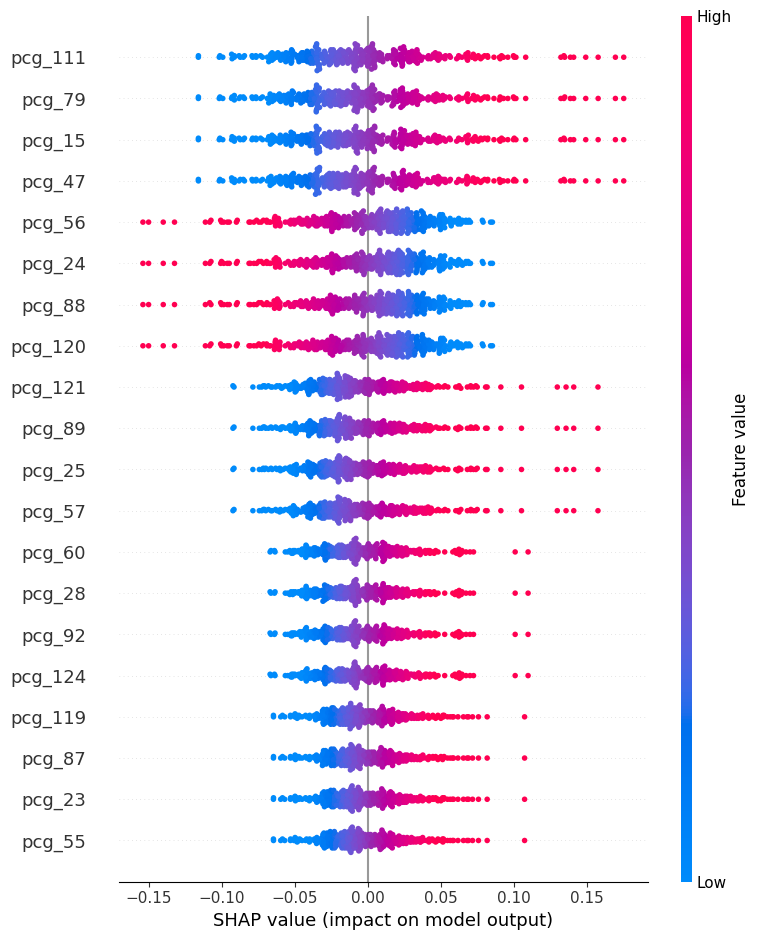

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])
shap.summary_plot(shap_values, X_test, max_display=20)

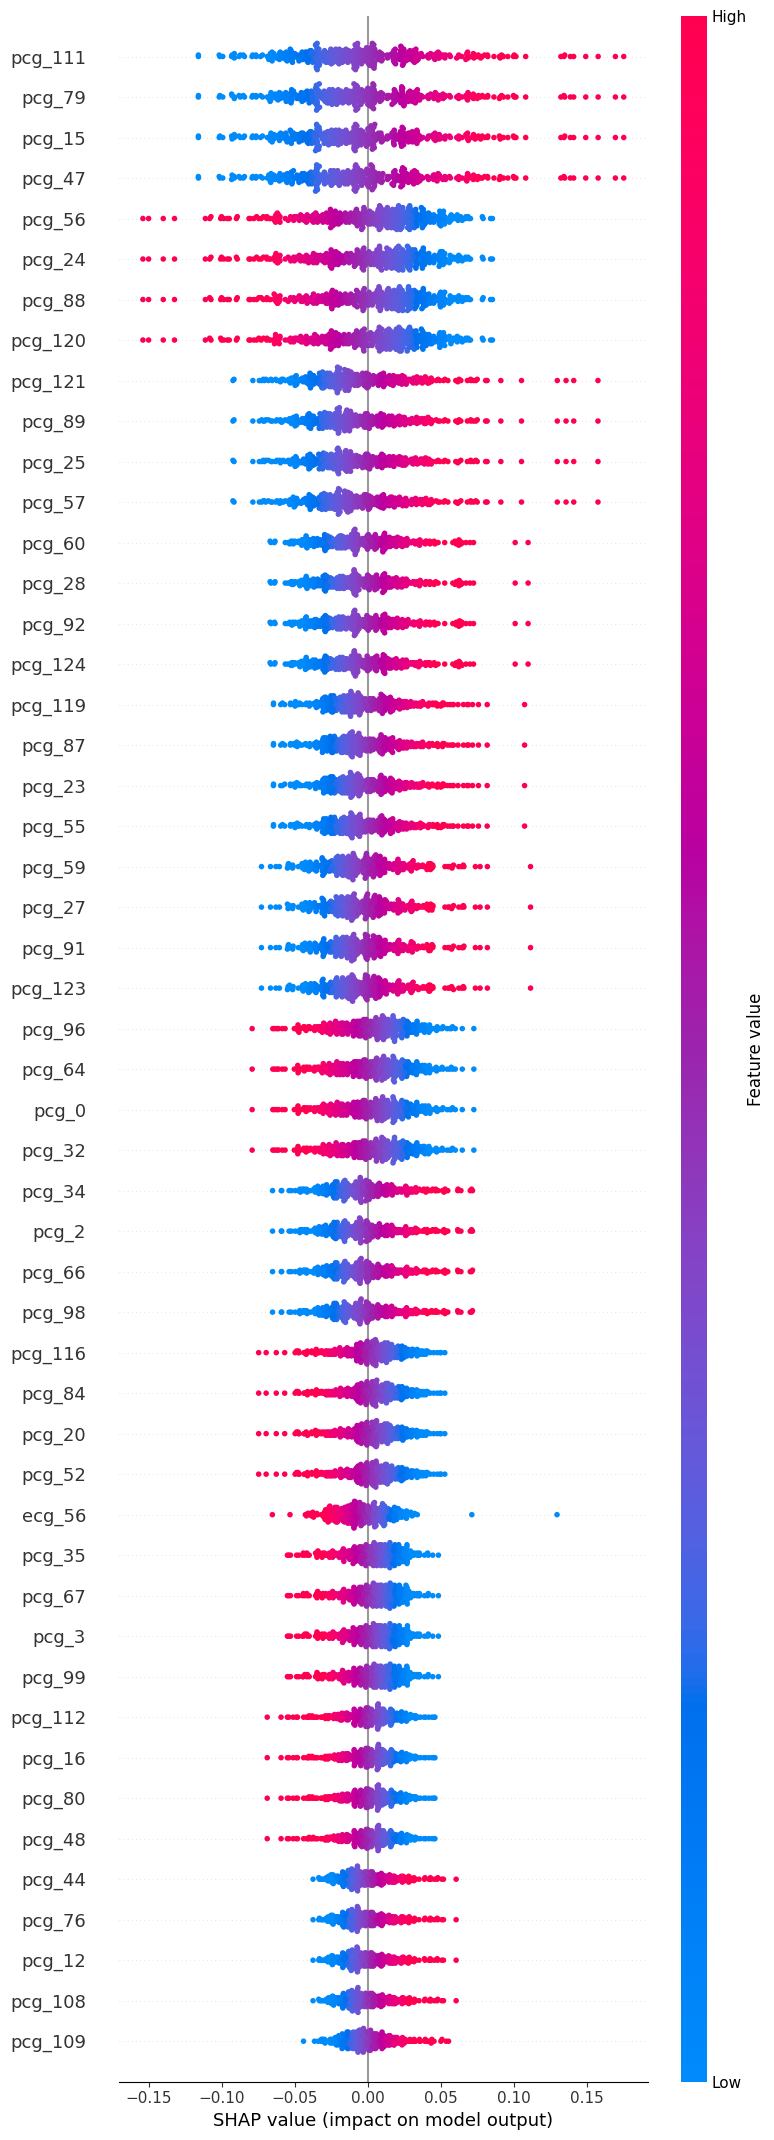

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :])
shap.summary_plot(shap_values, X_test, max_display=50)